In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

In [47]:
def load_iris_data():
    return load_iris()

In [71]:
iris = load_iris_data()

In [ ]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

In [5]:
def check_data(iris)-> pd.DataFrame:
    return pd.DataFrame(iris.data, columns=iris.feature_names)[["sepal width (cm)", "sepal length (cm)"]].head()

In [6]:
df = check_data(iris)
df

,sepal width (cm),sepal length (cm)
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

In [11]:
def linear_train_data(iris):
    iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
    X = iris_df.loc[:,['sepal width (cm)','petal length (cm)','petal width (cm)']].values
    y = iris_df['sepal length (cm)'].values
    return X, y

In [51]:
X,y = linear_train_data(iris)
X,y

(array([[3.5, 1.4, 0.2],
        [3. , 1.4, 0.2],
        [3.2, 1.3, 0.2],
        [3.1, 1.5, 0.2],
        [3.6, 1.4, 0.2],
        [3.9, 1.7, 0.4],
        [3.4, 1.4, 0.3],
        [3.4, 1.5, 0.2],
        [2.9, 1.4, 0.2],
        [3.1, 1.5, 0.1],
        [3.7, 1.5, 0.2],
        [3.4, 1.6, 0.2],
        [3. , 1.4, 0.1],
        [3. , 1.1, 0.1],
        [4. , 1.2, 0.2],
        [4.4, 1.5, 0.4],
        [3.9, 1.3, 0.4],
        [3.5, 1.4, 0.3],
        [3.8, 1.7, 0.3],
        [3.8, 1.5, 0.3],
        [3.4, 1.7, 0.2],
        [3.7, 1.5, 0.4],
        [3.6, 1. , 0.2],
        [3.3, 1.7, 0.5],
        [3.4, 1.9, 0.2],
        [3. , 1.6, 0.2],
        [3.4, 1.6, 0.4],
        [3.5, 1.5, 0.2],
        [3.4, 1.4, 0.2],
        [3.2, 1.6, 0.2],
        [3.1, 1.6, 0.2],
        [3.4, 1.5, 0.4],
        [4.1, 1.5, 0.1],
        [4.2, 1.4, 0.2],
        [3.1, 1.5, 0.2],
        [3.2, 1.2, 0.2],
        [3.5, 1.3, 0.2],
        [3.6, 1.4, 0.1],
        [3. , 1.3, 0.2],
        [3.4, 1.5, 0.2],


In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''

In [83]:
def logistic_train_data(iris):
    X = iris.data[:,:2]
    #y = (iris.target == 0).astype(np.int32)
    y = iris.target
    X = X[y != 2]
    y = y[y != 2]
    return X, y

In [82]:
def logistic_train_data2(iris):
    df = pd.DataFrame(iris.data)
    df['class'] = iris.target

    df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
    X = df[["sepal_wid", "sepal_len"]]
    mask = (df["class"] < 2) & (df["class"] >= 0)
    y_df = df[mask]
    y = y_df.iloc[:, -1]
    return X, y

In [84]:
X,y = logistic_train_data(iris)
len(X),len(y)
#iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''

In [85]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train, X_test, y_train, y_test = split_data(X,y)

In [ ]:
'''
Készíts egy függvényt ami feltanít egy lineaáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''

In [53]:
def train_linear_regression(X_train, y_train):
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    return linreg

In [ ]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''

In [19]:
def train_logistic_regression(X_train, y_train):
    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    return logreg

In [54]:
linregmodel = train_linear_regression(X_train,y_train)

In [87]:
logregmodel = train_logistic_regression(X_train,y_train)

In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''

In [88]:
def predict(model, X_test):
    return model.predict(X_test)

In [58]:
linreg_pred = predict(linregmodel,X_test)


In [89]:
logreg_pred = predict(logregmodel,X_test)


In [ ]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''

In [90]:
def plot_actual_vs_predicted(y_test, y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred)
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    return fig

Text(0, 0.5, 'Predicted')

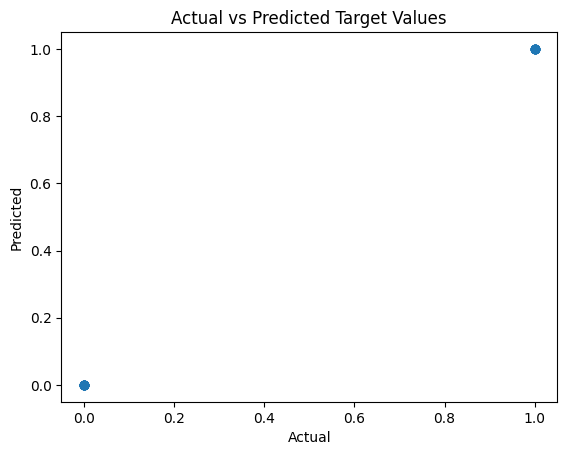

In [91]:
fig, ax = plt.subplots()
ax.scatter(y_test, logreg_pred)
ax.set_title('Actual vs Predicted Target Values')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

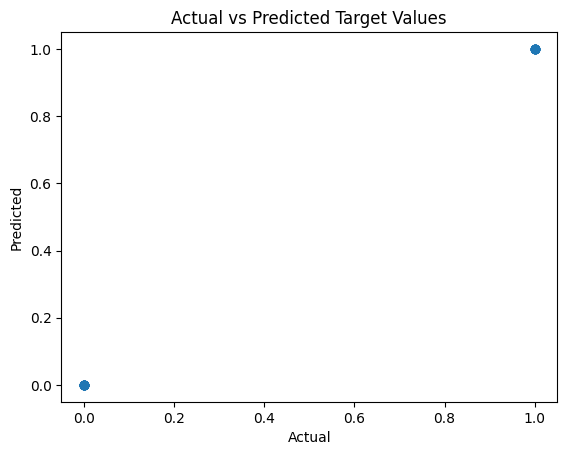

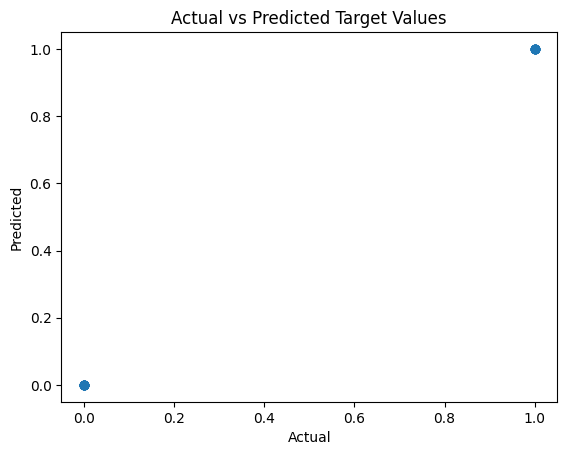

In [67]:
plot_actual_vs_predicted(y_test,logreg_pred)

In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''

In [92]:
def evaluate_model(y_test, y_pred):
    return mean_squared_error(y_test, y_pred)